In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv("train_u6lujuX_CVtuZ9i.csv") 

In [4]:
test=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")

In [5]:
train_original=train.copy() 
test_original=test.copy()

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
train.shape, test.shape

((614, 13), (367, 12))

In [10]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

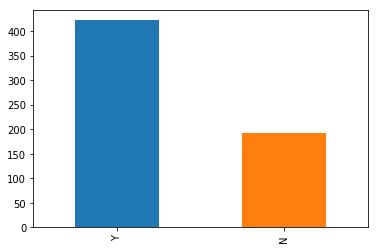

In [12]:
train['Loan_Status'].value_counts().plot.bar()

In [19]:
#Independent Variable (Categorical)

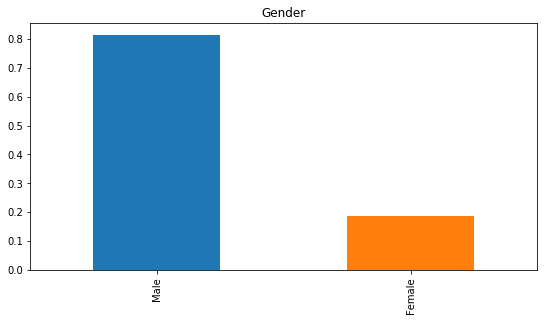

In [16]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 


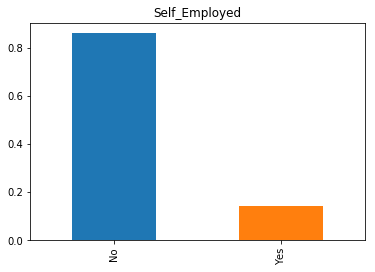

In [17]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 

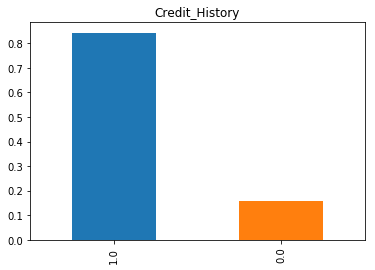

In [18]:
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 

In [20]:
# Independent Variable (Ordinal)

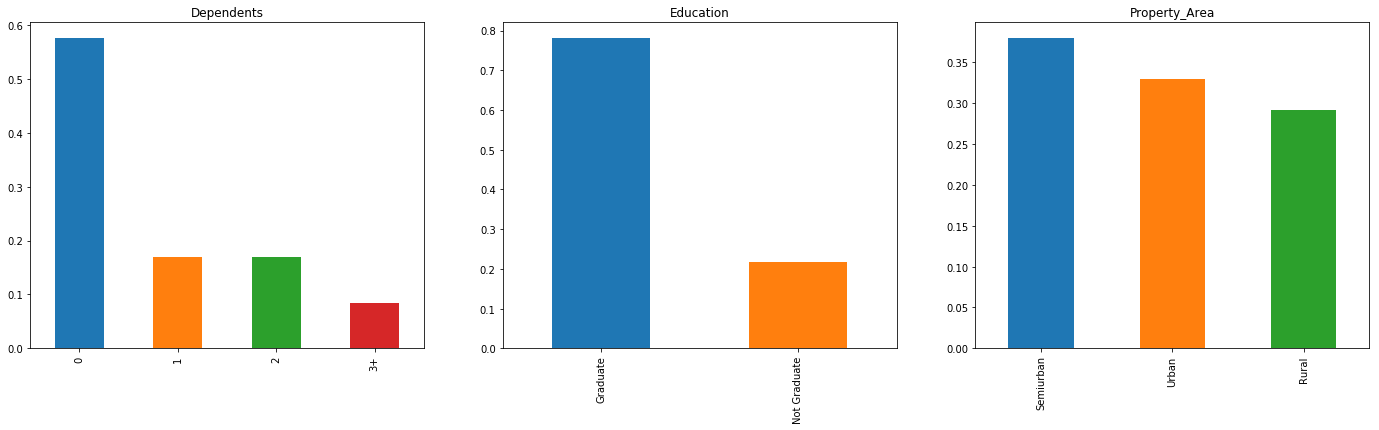

In [21]:
plt.figure(1) 
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

In [22]:
#Independent Variable (Numerical)

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


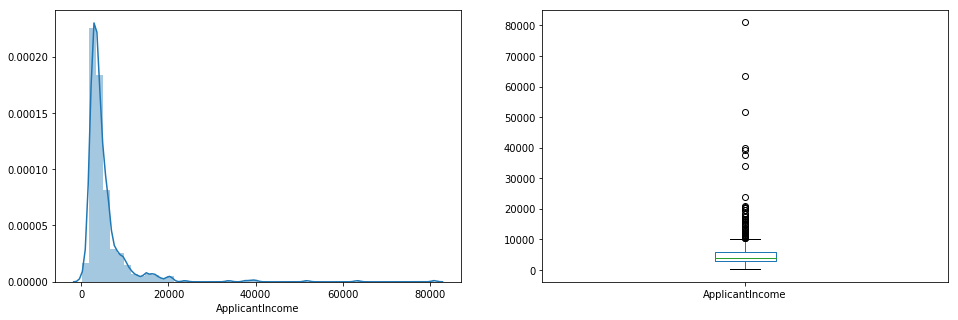

In [27]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

Text(0.5, 0.98, '')

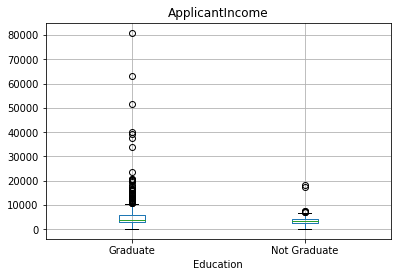

In [29]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


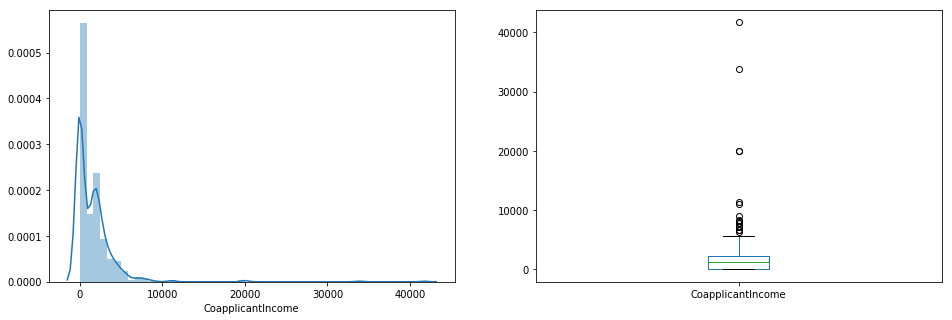

In [30]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

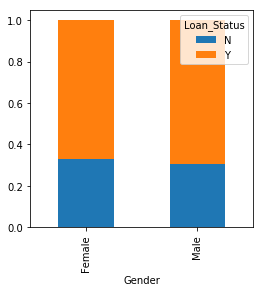

In [31]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

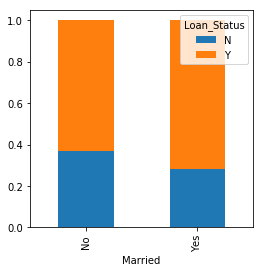

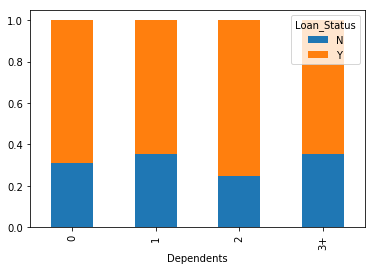

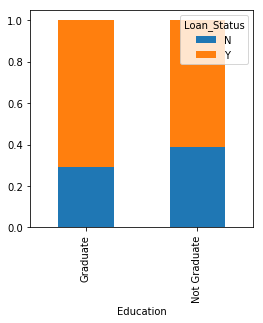

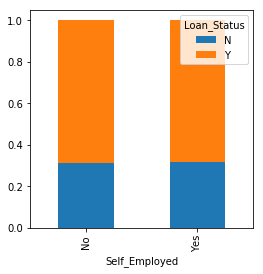

In [32]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

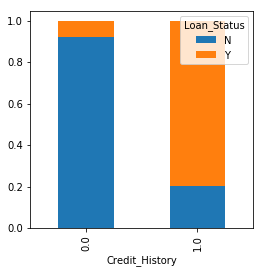

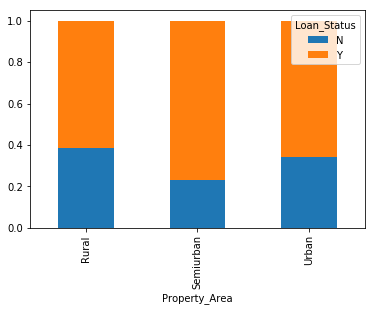

In [33]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()


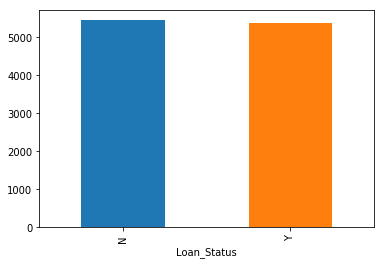

In [34]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [40]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']


In [43]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 

In [45]:
train['Married'].fillna(train['Married'].mode()[0], inplace=True)

In [46]:
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [47]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [48]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [49]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [50]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [51]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

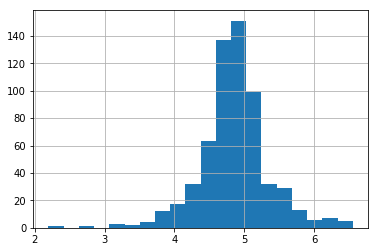

In [53]:
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])


In [54]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [55]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [56]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [59]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,          verbose=0, warm_start=False)


E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
pred_cv = model.predict(x_cv)

In [61]:
accuracy_score(y_cv,pred_cv)


0.8216216216216217

In [62]:
pred_test = model.predict(test)

In [64]:
submission=pd.read_csv("sample_submission_S7jWYrJ.csv")

In [65]:
submission['Loan_Status']=pred_test 

In [66]:
submission['Loan_ID']=test_original['Loan_ID']

In [67]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [68]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [69]:
from sklearn.model_selection import StratifiedKFold

In [74]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):     print('\n{} of kfold {}'.format(i,kf.n_splits))


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5


In [75]:
xtr,xvl = X.loc[train_index],X.loc[test_index]
ytr,yvl = y[train_index],y[test_index] 

In [76]:
 model = LogisticRegression(random_state=1)

In [77]:
     model.fit(xtr, ytr)     

E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
pred_test = model.predict(xvl)

In [79]:
score = accuracy_score(yvl,pred_test)

In [80]:
print('accuracy_score',score)

accuracy_score 0.8278688524590164


In [82]:
 i+=1 
pred_test = model.predict(test) 

In [83]:
pred=model.predict_proba(xvl)[:,1]

In [86]:
from sklearn import metrics 
#fpr, tpr, _ = metrics.roc_curve(yvl,  pred)

In [95]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']


In [96]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [97]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv')

In [98]:

train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome'] 

In [99]:
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


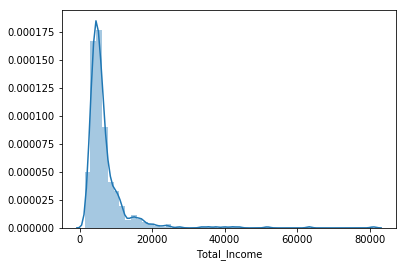

In [100]:
sns.distplot(train['Total_Income']);

In [101]:
train['Total_Income_log'] = np.log(train['Total_Income'])

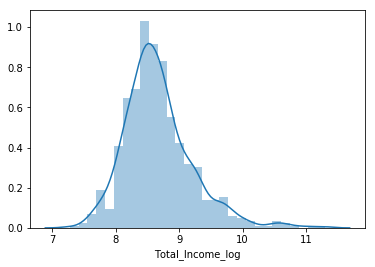

In [102]:
sns.distplot(train['Total_Income_log']); 

In [103]:
test['Total_Income_log'] = np.log(test['Total_Income'])

In [104]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']


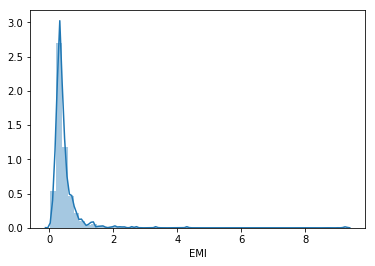

In [105]:
sns.distplot(train['EMI']);

In [106]:
train['Balance Income']=train['Total_Income']-(train['EMI']*1000)

In [107]:
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)

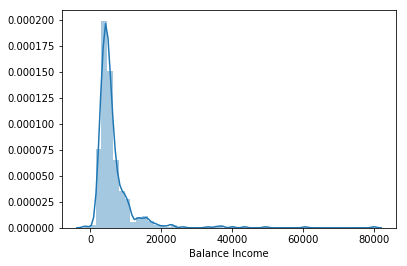

In [108]:
sns.distplot(train['Balance Income']);


In [109]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 


In [110]:
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [116]:
train

,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,...,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Total_Income,Total_Income_log,EMI,Balance Income
0,1.0,4.852030,0,1,1,0,1,0,0,0,...,0,0,0,1,0,1,5849.0,8.674026,0.355556,5493.444444
1,1.0,4.852030,0,1,0,1,0,1,0,0,...,0,1,0,0,1,0,6091.0,8.714568,0.355556,5735.444444
2,1.0,4.189655,0,1,0,1,1,0,0,0,...,1,0,0,1,0,1,3000.0,8.006368,0.183333,2816.666667
3,1.0,4.787492,0,1,0,1,1,0,0,0,...,0,0,0,1,0,1,4941.0,8.505323,0.333333,4607.666667
4,1.0,4.948760,0,1,1,0,1,0,0,0,...,0,0,0,1,0,1,6000.0,8.699515,0.391667,5608.333333
5,1.0,5.587249,0,1,0,1,0,0,1,0,...,1,0,0,1,0,1,9613.0,9.170872,0.741667,8871.333333
6,1.0,4.553877,0,1,0,1,1,0,0,0,...,0,0,0,1,0,1,3849.0,8.255569,0.263889,3585.111111
7,0.0,5.062595,0,1,0,1,0,0,0,1,...,0,0,1,0,1,0,5540.0,8.619750,0.438889,5101.111111
8,1.0,5.123964,0,1,0,1,0,0,1,0,...,0,0,0,1,0,1,5532.0,8.618305,0.466667,5065.333333
9,1.0,5.855072,0,1,0,1,0,1,0,0,...,0,0,1,0,1,0,23809.0,10.077819,0.969444,22839.555556


In [118]:
i=1 

In [119]:
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 

In [121]:
for train_index,test_index in kf.split(X,y):     print('\n{} of kfold {}'.format(i,kf.n_splits))     


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5


In [122]:
xtr,xvl = X.loc[train_index],X.loc[test_index]     
ytr,yvl = y[train_index],y[test_index]         

In [123]:
model = LogisticRegression(random_state=1)     
model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     

accuracy_score 0.8278688524590164


E:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [124]:
i+=1 

In [125]:
pred_test = model.predict(test) 
pred=model.predict_proba(xvl)[:,1]

In [126]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions 
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID

In [127]:
# replacing 0 and 1 with N and Y 
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [128]:
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Log2.csv')


In [129]:
from sklearn import tree

In [131]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     print('\n{} of kfold {}'.format(i,kf.n_splits))     
xtr,xvl = X.loc[train_index],X.loc[test_index]     
ytr,yvl = y[train_index],y[test_index]         
model = tree.DecisionTreeClassifier(random_state=1)     
model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     
i+=1 
pred_test = model.predict(test)


1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.7213114754098361


In [132]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID


In [133]:
# replacing 0 and 1 with N and Y 
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [134]:
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision Tree.csv')

In [135]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     print('\n{} of kfold {}'.format(i,kf.n_splits))     
xtr,xvl = X.loc[train_index],X.loc[test_index]     
ytr,yvl = y[train_index],y[test_index]         
model = RandomForestClassifier(random_state=1, max_depth=10)     
model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     
i+=1 



1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.7704918032786885


E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [136]:
pred_test = model.predict(test)

In [137]:
from sklearn.model_selection import GridSearchCV
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split 
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)
# Fit the grid search model 
grid_search.fit(x_train,y_train)
GridSearchCV(cv=None, error_score='raise',       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',            max_depth=None, max_features='auto', max_leaf_nodes=None,            min_impurity_decrease=0.0, min_impurity_split=None,            min_samples_leaf=1, min_samples_split=2,            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,            oob_score=False, random_state=1, verbose=0, warm_start=False),       
fit_params=None, iid=True, n_jobs=1,       
param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},       
pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',       
scoring=None, verbose=0)
# Estimating the optimized value 
grid_search.best_estimator_
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',            max_depth=3, max_features='auto', max_leaf_nodes=None,            min_impurity_decrease=0.0, min_impurity_split=None,            
min_samples_leaf=1, min_samples_split=2,            
min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,            
oob_score=False, random_state=1, verbose=0, warm_start=False)

E:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [139]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     print('\n{} of kfold {}'.format(i,kf.n_splits))     
xtr,xvl = X.loc[train_index],X.loc[test_index]     
ytr,yvl = y[train_index],y[test_index]         
model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)    
model.fit(xtr, ytr)     
pred_test = model.predict(xvl)     
score = accuracy_score(yvl,pred_test)     
print('accuracy_score',score)     
i+=1 
pred_test = model.predict(test) 
pred2=model.predict_proba(test)[:,1]



1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5

1 of kfold 5
accuracy_score 0.8278688524590164


In [140]:
submission['Loan_Status']=pred_test            # filling Loan_Status with predictions 
submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID
# replacing 0 and 1 with N and Y 
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
# Converting submission file to .csv format 
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Random Forest.csv')

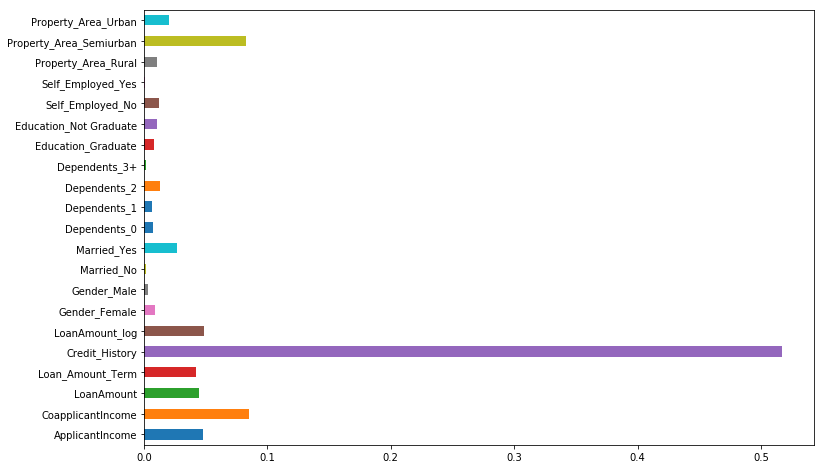

In [141]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))
